<a href="https://colab.research.google.com/github/nlei1/nlp-notebooks/blob/main/word2vec_google_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd 
import os
import zipfile
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
import gensim
import gensim.downloader as api
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/noi.csv'
drugs = pd.read_csv(url, error_bad_lines=False)

In [3]:
model = api.load("word2vec-google-news-300")  # download the model and return as object ready for use

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
def valid_word(col):
  valid_drugs = []
  for drug in col:
    if drug in model.vocab:
      valid_drugs.append(drug)
  return(valid_drugs)

def get_embeddings(to_embed):
  embeddings = []
  for drug in to_embed:
    embeddings.append(model.wv[drug.lower()])
  return embeddings

valid_drugs = valid_word(drugs["names"])
embeddings = get_embeddings(valid_word(valid_drugs))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sns.set_style("darkgrid")

def get_pca(embeddings):
  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(embeddings)
  post_pca = pd.DataFrame(pca_result, columns = ['x','y'])
  return post_pca

def get_tsne(embeddings, p_perplexity=1, p_n_iter=1500):
  tsne = TSNE(n_components=2, perplexity=p_perplexity, n_iter=p_n_iter)
  tsne_result = tsne.fit_transform(embeddings)
  post_tsne = pd.DataFrame(tsne_result, columns = ['x','y'])
  return post_tsne

def plot_with_labels(post_reduction):
  post_reduction_annotated = post_reduction.join(pd.DataFrame(valid_drugs, columns=['label']))
  ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
  post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)

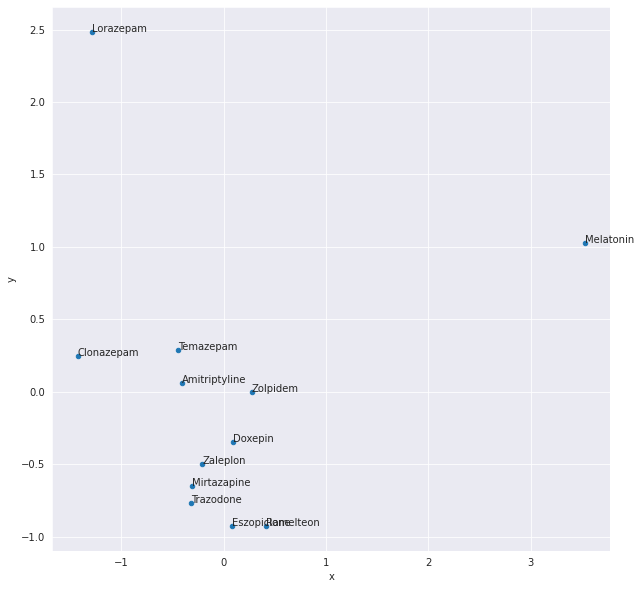

In [10]:
plot_with_labels(get_pca(embeddings))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


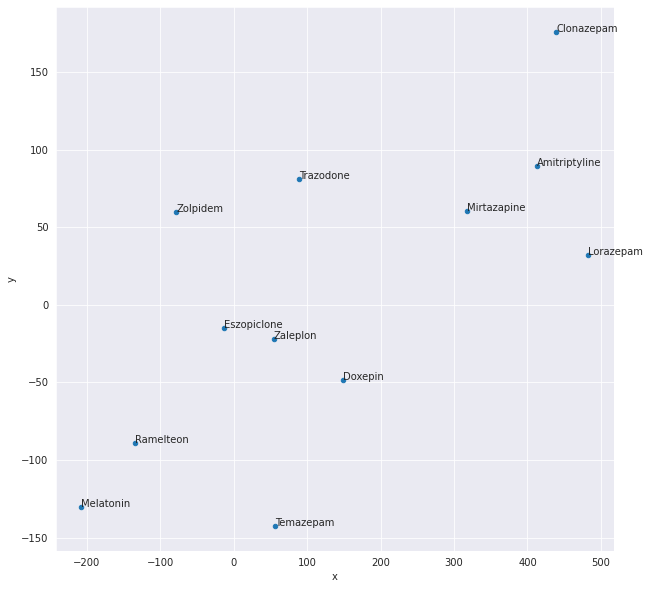

In [11]:
plot_with_labels(get_tsne(embeddings, p_perplexity=1, p_n_iter=2000))